###参考：https://cuijiahua.com/blog/2017/11/ml_6_logistic_1.html

In [1]:
#加载云盘

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#加载数据集
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/机器学习/Logistic回归/testSet.txt",sep="\t",header=None,names=["col_1","col_2","label"])
df


,col_1,col_2,label
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0
...,...,...,...
95,0.677983,2.556666,1
96,0.761349,10.693862,0
97,-2.168791,0.143632,1
98,1.388610,9.341997,0


In [4]:
import seaborn as sns

In [5]:
#数据可视化与预处理
df.describe()

,col_1,col_2,label
count,100.000000,100.000000,100.000000
mean,0.030012,6.576110,0.530000
std,1.170337,4.644942,0.501614
min,-3.642001,-3.181888,0.000000
25%,-0.790164,2.828881,0.000000
50%,0.083975,6.893569,1.000000
75%,0.834009,10.458066,1.000000
max,3.010150,14.739025,1.000000


In [6]:
#检查空值
df.isnull().sum()

col_1    0
col_2    0
label    0
dtype: int64

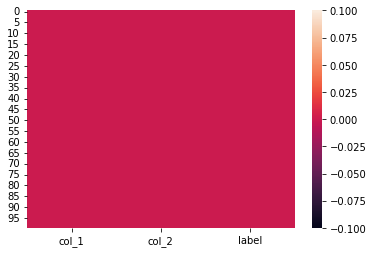

In [7]:
sns.heatmap(df.isnull())  #空值检验的可视化方法

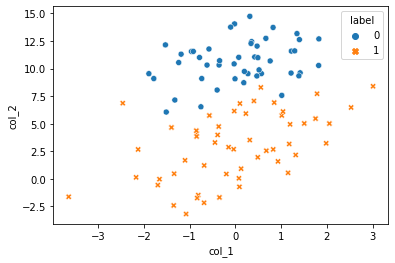

In [8]:
#数据集可视化
sns.scatterplot(x=df["col_1"],y=df["col_2"],style=df["label"],hue=df["label"])

In [9]:
#训练集数据准备
import numpy as np
w0=np.ones(len(df))
w0=pd.DataFrame(w0,columns=["w0"])
train_data=pd.concat([w0,df.iloc[:,:2]],axis=1)       
train_label=df["label"]
print(train_data.head(5))
print(train_label.head(5))

    w0     col_1      col_2
0  1.0 -0.017612  14.053064
1  1.0 -1.395634   4.662541
2  1.0 -0.752157   6.538620
3  1.0 -1.322371   7.152853
4  1.0  0.423363  11.054677
0    0
1    1
2    0
3    0
4    0
Name: label, dtype: int64


In [10]:
train_data.shape[0]

100

In [11]:
#自己定义sigmod函数
def my_sigmod(x):
  return 1/(1+np.exp(-x))

#训练模型搭建
def train_logistic_cls(train_data,train_label,times):     #数据+迭代次数
  m,n=train_data.shape                    #m样本数量,n参数数量
  alpha=0.001                         #步长
  #初始化参数
  weights=np.ones(n)
  for t in range(times):                 #用numpy会好一点，又写复杂了
      x=train_data*weights
      h=my_sigmod(x.sum(axis=1))
      error=train_label-h
      grad=train_data.transpose()*error         #梯度上升矢量化公式
      grad=grad.sum(axis=1)
      weights=weights+alpha*grad
  return weights  


In [12]:
#训练模型
weights=train_logistic_cls(train_data,train_label,500)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


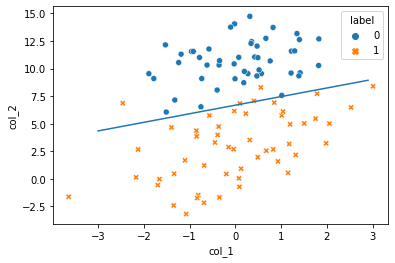

In [13]:
##可视化查看分类效果
x=np.arange(-3.0, 3.0, 0.1)
y=(-weights[0]-weights[1]*x)/weights[2]
sns.lineplot(x,y)
sns.scatterplot(x=df["col_1"],y=df["col_2"],style=df["label"],hue=df["label"])

###改进算法：随机梯度上升

In [14]:
#随机梯度上升算法
#上面梯度更新时不需要全部矩阵计算一遍，随机选取一个样本，在此基础上更新梯度
#训练模型搭建
import random
def sga_train_logistic_cls(train_data,train_label,times):     #数据+迭代次数
  m,n=train_data.shape                    #m样本数量,n参数数量
  #初始化参数
  weights=np.ones(n)
  for t in range(times):                 
    dataindex=list(range(m))
    for s in range(m):
      alpha=4/(1.0+t+s)+0.01               #步长基数增加，因为不用求和，且步长随着迭代次数的增加而减小
      randindex=int(random.uniform(0,len(dataindex)))
      x=train_data.values[dataindex[randindex]]*weights
      h=my_sigmod(x.sum())
      error=train_label[dataindex[randindex]]-h
      weights=weights+alpha*train_data.values[dataindex[randindex]]*error
      del(dataindex[randindex])    
  return weights 

In [15]:
weights=sga_train_logistic_cls(train_data,train_label,200)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


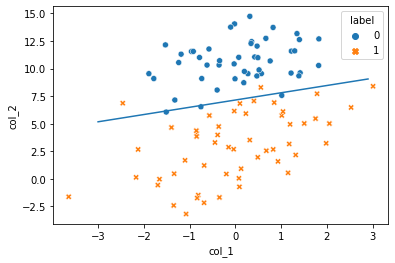

In [16]:
##可视化查看分类效果
x=np.arange(-3.0, 3.0, 0.1)
y=(-weights[0]-weights[1]*x)/weights[2]
sns.lineplot(x,y)
sns.scatterplot(x=df["col_1"],y=df["col_2"],style=df["label"],hue=df["label"])  #迭代200次的时候差不多收敛

###其他改进
1.在非线性分类的时候，通过增加X的二次项或者三次项，即z=wo*1+w1*x1+w2*x2+w3*x1^2+w4*x2^2+…

2.在多分类问题的改进？